# SC1015 Mini Project (Cardiovascular diseases)

Our group:
- U2321708L Chester Chan
- U2321317H Jothilingam Dheeraj
- U2220875L Liu Han Wen
 
## Problem Statement:
How can we identify the communities in America with a high-risk for cardiovascular diseases?

1. Variables used to evaluate the effectiveness of the examined dataset: 
- Numerical data
- Categorical data

2. Machine learning models utilised to determine which provides the best prediction:
- Logistic regression
- Gradient boosting
- Random forest
- Decision tree




## Importing the dataset, preparation and analysis of dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [ ]:
heart=pd.read_csv('Heart unclean.csv')
heart.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
print("Data type : ", type(heart))
print("Data dims : ", heart.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (445132, 40)


In [ ]:
# Information about the Variables
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [ ]:
# Check missing values in data
heart.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

# Exploratory Data Analysis 

## Simplifying the variables

In [ ]:
heart['AccessedMedicalServices']=np.where((heart['LastCheckupTime'].notnull()) | (heart['ChestScan'] == 'Yes') | (heart['HIVTesting'] == 'Yes') | (heart['FluVaxLast12'] == 'Yes') | (heart['PneumoVaxEver'] == 'Yes') | (heart['CovidPos'] == 'Yes'), 'Yes','No')
heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AccessedMedicalServices
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Yes
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,63.50,25.61,No,No,No,No,NaN,No,Yes,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Yes
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Yes


In [ ]:
heart['HaveCardiovascularDisease']=np.where(((heart['HadHeartAttack'] == 'Yes') | (heart['HadAngina'] == 'Yes')), 'Yes','No')
heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AccessedMedicalServices,HaveCardiovascularDisease
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Yes,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,25.61,No,No,No,No,NaN,No,Yes,Yes,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Yes,No


In [ ]:
heart['newBMI'] = 1.3 * heart['WeightInKilograms']/(heart['HeightInMeters']**2.5)

In [ ]:
heart['originalBMI'] = heart['WeightInKilograms']/(heart['HeightInMeters']*heart['HeightInMeters'])

In [ ]:
##dropping irrelevant columns
heart = heart.drop(['RemovedTeeth','TetanusLast10Tdap','WeightInKilograms','HeightInMeters','BMI','HighRiskLastYear','HadHeartAttack','HadAngina'], axis=1)

In [ ]:
heart = heart.drop(['LastCheckupTime','ChestScan','HIVTesting','FluVaxLast12','PneumoVaxEver','CovidPos'], axis=1) ##dropping the merged columns


In [ ]:
heart.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
PhysicalActivities            1093
SleepHours                    5453
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
RaceEthnicityCategory        14057
AgeCategory                   9079
AlcoholDrinkers              46574
AccessedMedicalServices          0
HaveCardiovascularDisease        0
newBMI              

# Exploratory Analysis on Numerical Data

In [ ]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(heart[["originalBMI","newBMI", "PhysicalHealthDays", "MentalHealthDays", "SleepHours","HaveCardiovascularDisease"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,originalBMI,newBMI,PhysicalHealthDays,MentalHealthDays,SleepHours
count,398564.00,398564.00,434205.00,436065.00,439679.00
mean,28.53,28.46,4.35,4.38,7.02
std,6.61,6.78,8.69,8.39,1.50
min,6.77,5.99,0.00,0.00,1.00
25%,24.11,23.97,0.00,0.00,6.00
50%,27.35,27.32,0.00,0.00,7.00
75%,31.80,31.54,3.00,5.00,8.00
max,235.53,320.97,30.00,30.00,24.00


## Cleaning the data for newBMI
Lowest recorded BMI and Highest recorded BMI are 13.6 and 204 respectively.
https://www.bbc.com/news/uk-england-leeds-44488822

In [ ]:
min_newBMI,max_newBMI = 13.6 , 204
min_originalBMI,max_originalBMI = 13.6 , 204

# Remove outliers
outliers_count = len(numeric_data[(numeric_data['newBMI'] < min_newBMI) | (numeric_data['newBMI'] > max_newBMI) |
                (numeric_data['originalBMI'] < min_originalBMI) | (numeric_data['originalBMI'] > max_originalBMI)])

# Check how many rows have been removed
rows_removed = outliers_count
print(f"Number of outlier rows removed: {rows_removed}")

# Now, remove the outliers
numeric_data = numeric_data[(numeric_data['newBMI'] >= min_newBMI) & (numeric_data['newBMI'] <= max_newBMI) &
                (numeric_data['originalBMI'] >= min_originalBMI) & (numeric_data['originalBMI'] <= max_originalBMI)]

heart = heart[(heart['newBMI'] >= min_newBMI) & (heart['newBMI'] <= max_newBMI) &
                (heart['originalBMI'] >= min_originalBMI) & (heart['originalBMI'] <= max_originalBMI)]

rows_after_removal = numeric_data.shape[0]
print(f"Number of rows after removing outliers: {rows_after_removal}")

Number of outlier rows removed: 341
Number of rows after removing outliers: 398223


In [ ]:
numeric_data.describe()

,originalBMI,newBMI,PhysicalHealthDays,MentalHealthDays,SleepHours
count,398223.000000,398223.000000,389284.000000,390863.000000,394099.000000
mean,28.544699,28.475160,4.375168,4.425001,7.024123
std,6.585290,6.743217,8.700598,8.398869,1.491042
min,13.653979,13.613761,0.000000,0.000000,1.000000
25%,24.107143,23.965430,0.000000,0.000000,6.000000
50%,27.375650,27.315409,0.000000,0.000000,7.000000
75%,31.807159,31.540693,4.000000,5.000000,8.000000
max,173.798748,200.487885,30.000000,30.000000,24.000000


In [ ]:
heart.to_csv('cleaned-heart.csv')

# Distribution of numerical data

> plot a boxplot, violinplot and histogram for each numerical data. Each type of plot should have a different color.

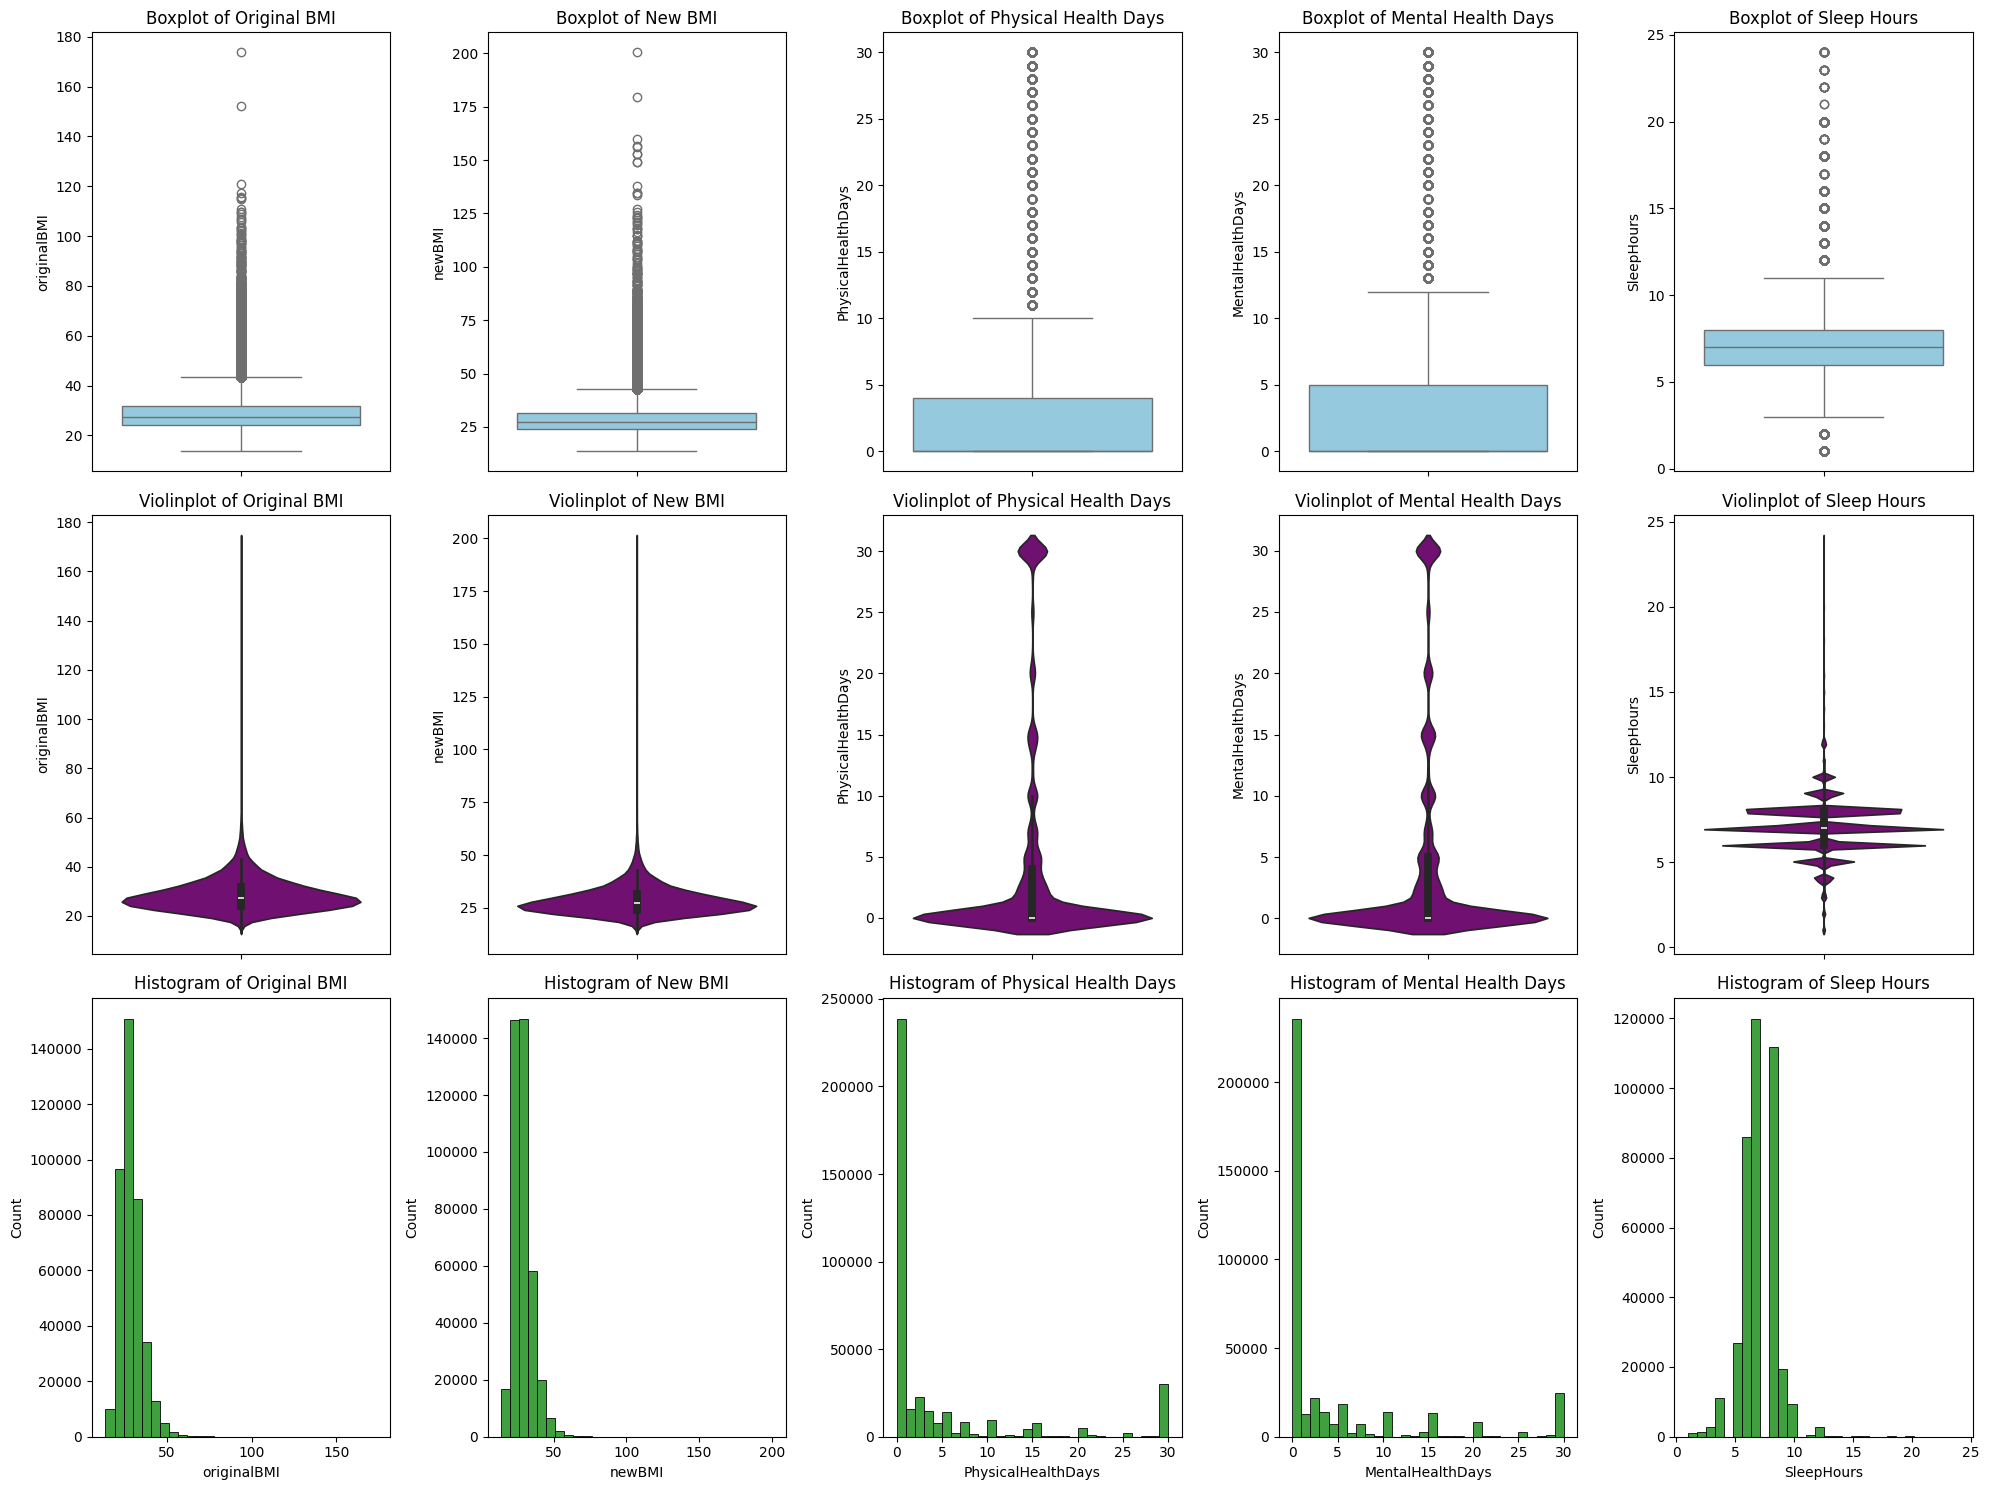

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

# Boxplots
sb.boxplot(data=numeric_data, y='originalBMI', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Boxplot of Original BMI')
sb.boxplot(data=numeric_data, y='newBMI', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Boxplot of New BMI')
sb.boxplot(data=numeric_data, y='PhysicalHealthDays', ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title('Boxplot of Physical Health Days')
sb.boxplot(data=numeric_data, y='MentalHealthDays', ax=axes[0, 3], color='skyblue')
axes[0, 3].set_title('Boxplot of Mental Health Days')
sb.boxplot(data=numeric_data, y='SleepHours', ax=axes[0, 4], color='skyblue')
axes[0, 4].set_title('Boxplot of Sleep Hours')

# Violinplots
sb.violinplot(data=numeric_data, y='originalBMI', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Violinplot of Original BMI')
sb.violinplot(data=numeric_data, y='newBMI', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Violinplot of New BMI')
sb.violinplot(data=numeric_data, y='PhysicalHealthDays', ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Violinplot of Physical Health Days')
sb.violinplot(data=numeric_data, y='MentalHealthDays', ax=axes[1, 3], color='purple')
axes[1, 3].set_title('Violinplot of Mental Health Days')
sb.violinplot(data=numeric_data, y='SleepHours', ax=axes[1, 4], color='purple')
axes[1, 4].set_title('Violinplot of Sleep Hours')

# Histograms
sb.histplot(data=numeric_data, x='originalBMI', ax=axes[2, 0], color='green', bins=30)
axes[2, 0].set_title('Histogram of Original BMI')
sb.histplot(data=numeric_data, x='newBMI', ax=axes[2, 1], color='green', bins=30)
axes[2, 1].set_title('Histogram of New BMI')
sb.histplot(data=numeric_data, x='PhysicalHealthDays', ax=axes[2, 2], color='green', bins=30)
axes[2, 2].set_title('Histogram of Physical Health Days')
sb.histplot(data=numeric_data, x='MentalHealthDays', ax=axes[2, 3], color='green', bins=30)
axes[2, 3].set_title('Histogram of Mental Health Days')
sb.histplot(data=numeric_data, x='SleepHours', ax=axes[2, 4], color='green', bins=30)
axes[2, 4].set_title('Histogram of Sleep Hours')

plt.tight_layout()
plt.show()

The plots have been generated:

- Boxplots, violinplots, and histograms for each numerical variable: Original BMI, New BMI, Physical Health Days, Mental Health Days, and Sleep Hours.
- Each type of plot is colored differently for distinction: boxplots in sky blue, violinplots in purple, and histograms in green.

# After cleaning numeric data, plot boxplot between numerical data and heart[HaveCardiovascularDisease]

/tmp/ipykernel_62/2116138394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.boxplot(x=numeric_data['HaveCardiovascularDisease'], y=numeric_data[var], data=numeric_data, ax=axes[count], palette=["#FF5733", "#33FF57"])
/tmp/ipykernel_62/2116138394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.boxplot(x=numeric_data['HaveCardiovascularDisease'], y=numeric_data[var], data=numeric_data, ax=axes[count], palette=["#FF5733", "#33FF57"])
/tmp/ipykernel_62/2116138394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.boxplot(x=numeric_data['Have

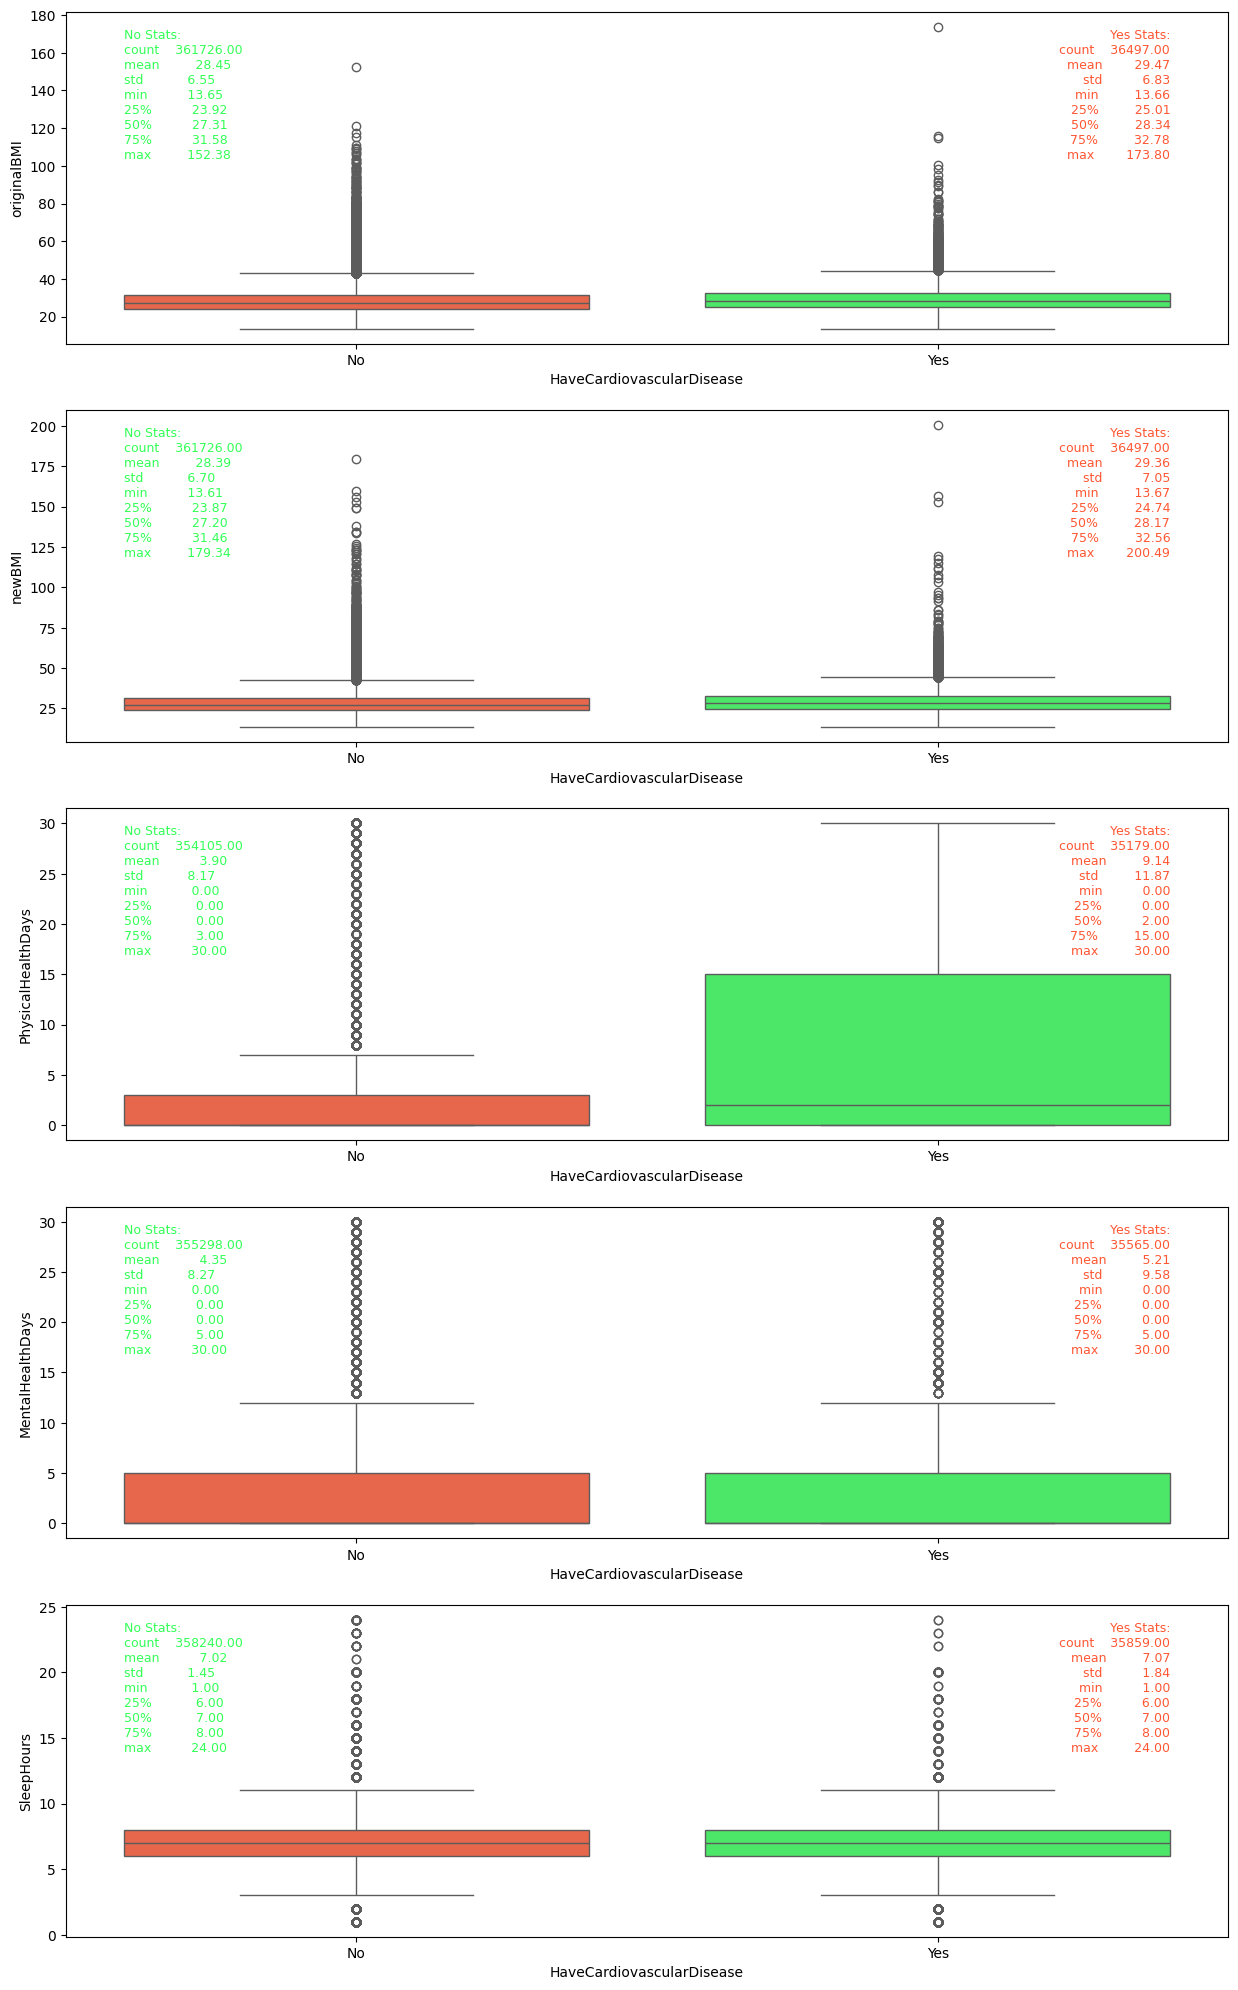

In [ ]:
f, axes = plt.subplots(5, 1, figsize=(15, 25))

count = 0
for var in numeric_data:
    plot = sb.boxplot(x=numeric_data['HaveCardiovascularDisease'], y=numeric_data[var], data=numeric_data, ax=axes[count], palette=["#FF5733", "#33FF57"])
    # Get statistical summary and display it on the plots
    stats = numeric_data.groupby('HaveCardiovascularDisease')[var].describe()
    plt.text(0.95, 0.95, 'Yes Stats:\n' + stats.loc['Yes'].round(2).to_string(), horizontalalignment='right', verticalalignment='top', transform=axes[count].transAxes, fontsize=9, color="#FF5733")
    plt.text(0.05, 0.95, 'No Stats:\n' + stats.loc['No'].round(2).to_string(), horizontalalignment='left', verticalalignment='top', transform=axes[count].transAxes, fontsize=9, color="#33FF57")
    count += 1
    if count == 5:
        break

> Generate a correlation matrix to explore relationships between numerical variables.

In [ ]:
# Remove the non-numeric column and calculate correlation matrix
numeric_data_without_cvd = numeric_data.drop(columns=['HaveCardiovascularDisease'])
numeric_data_without_cvd.corr()

,originalBMI,newBMI,PhysicalHealthDays,MentalHealthDays,SleepHours
originalBMI,1.000000,0.988936,0.112905,0.076455,-0.050149
newBMI,0.988936,1.000000,0.117958,0.082228,-0.046640
PhysicalHealthDays,0.112905,0.117958,1.000000,0.318200,-0.054565
MentalHealthDays,0.076455,0.082228,0.318200,1.000000,-0.129657
SleepHours,-0.050149,-0.046640,-0.054565,-0.129657,1.000000


The correlation matrix for the numerical variables has been generated. Here are the key observations:

- **BMI and newBMI**: There is a very high correlation (approximately 0.99) between the original BMI and the new BMI calculation, indicating that they are almost linearly dependent on each other.
- **Physical and Mental Health Days**: There is a moderate positive correlation (approximately 0.32) between the number of physical health days and mental health days, suggesting that individuals with more physically unhealthy days also tend to report more mentally unhealthy days.
- **Health Days and Sleep Hours**: Both physical and mental health days have a slight negative correlation with sleep hours, suggesting that more unhealthy days might be associated with fewer hours of sleep.

> perform heatmap of the above variables

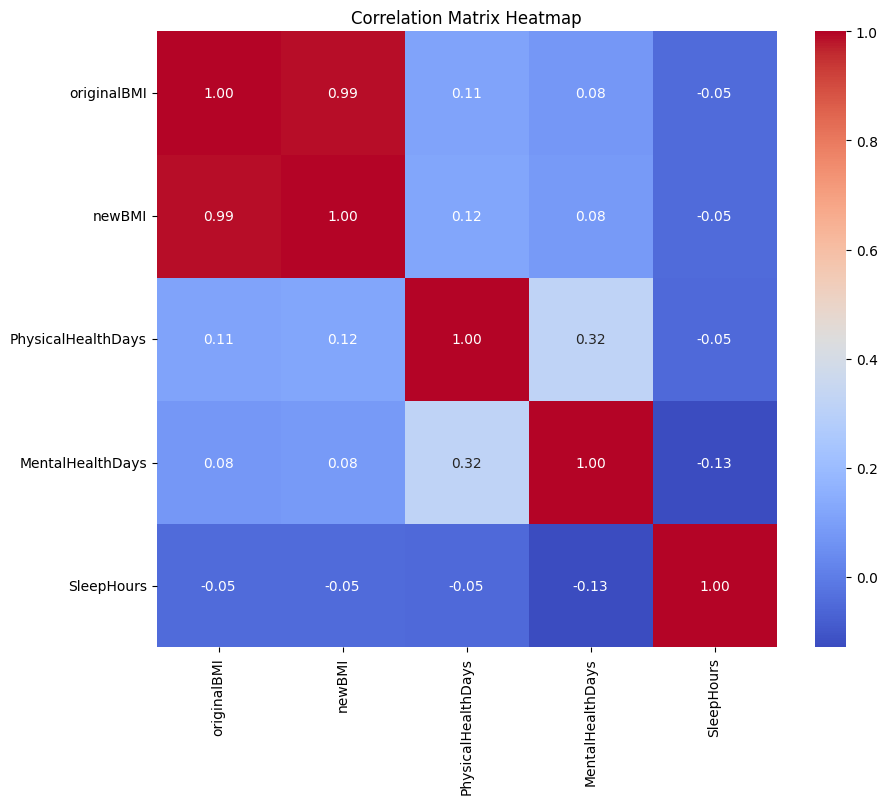

In [ ]:
# Heatmap for the correlation matrix of numerical data without CVD
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_data_without_cvd.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Exploratory analysis on Categorical data

## Distribution of the categorical data

Racial Demographic : 6
RaceEthnicityCategory
White only, Non-Hispanic         291164
Hispanic                          36867
Black only, Non-Hispanic          31047
Other race only, Non-Hispanic     20051
Multiracial, Non-Hispanic          8807
Name: count, dtype: int64
/tmp/ipykernel_62/2219781792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(y = "RaceEthnicityCategory", data = heart, kind = "count", palette="bright")


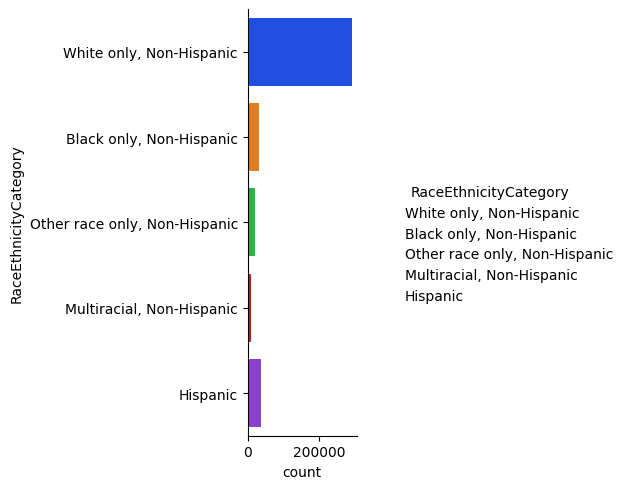

In [ ]:
##exploratory analysis

print("Racial Demographic :", len(heart["RaceEthnicityCategory"].unique()))

# types of races
print(heart["RaceEthnicityCategory"].value_counts())
sb.catplot(y = "RaceEthnicityCategory", data = heart, kind = "count", palette="bright")

Number of States : 54
State
Washington              22978
Minnesota               15294
New York                15096
Ohio                    14940
Maryland                14326
Texas                   12278
Florida                 11843
Kansas                  10227
Wisconsin               10116
Maine                    9799
Massachusetts            9746
California               9518
Virginia                 9411
Arizona                  9222
Indiana                  8878
South Carolina           8829
Utah                     8788
Michigan                 8779
Colorado                 8431
Connecticut              8243
Iowa                     8149
Georgia                  8047
Vermont                  7788
Hawaii                   7328
Nebraska                 6891
Missouri                 6883
South Dakota             6877
New Jersey               6796
Montana                  6562
New Hampshire            5940
Idaho                    5734
Alaska                   5310
Puerto Rico 

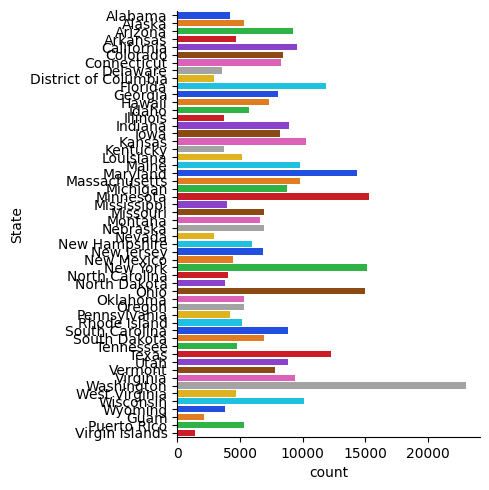

In [ ]:
print("Number of States :", len(heart["State"].unique()))

# Pokemons in each Generation
print(heart["State"].value_counts())
sb.catplot(y = "State", data = heart, kind = "count",palette="bright")

Age Demographic : 14
AgeCategory
Age 65 to 69       42769
Age 60 to 64       40120
Age 70 to 74       39662
Age 80 or older    33340
Age 55 to 59       33052
Age 50 to 54       30031
Age 75 to 79       29883
Age 40 to 44       26702
Age 45 to 49       25509
Age 35 to 39       25488
Age 18 to 24       24224
Age 30 to 34       23000
Age 25 to 29       19796
Name: count, dtype: int64
/tmp/ipykernel_62/3072666812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(y = "AgeCategory", data = heart, kind = "count",palette="bright")


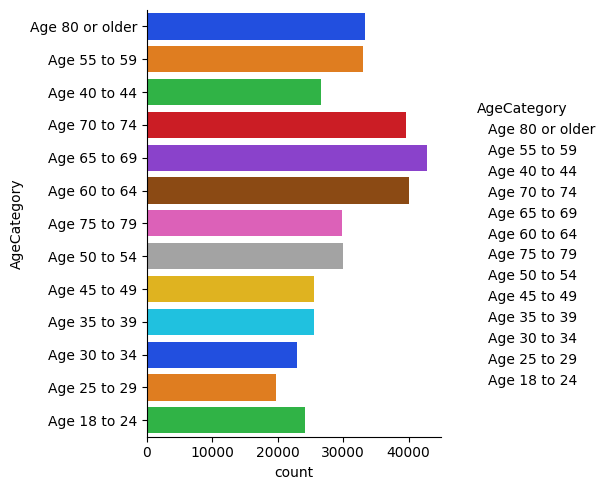

In [ ]:
print("Age Demographic :", len(heart["AgeCategory"].unique()))

# Pokemons in each Generation
print(heart["AgeCategory"].value_counts())
sb.catplot(y = "AgeCategory", data = heart, kind = "count",palette="bright")

## Exploratory Analysis of categorical variables against "HaveCardiovascularDisease" variable

In [ ]:
categorical_data = pd.DataFrame(heart[["State","HaveCardiovascularDisease","GeneralHealth","HadDepressiveDisorder","RaceEthnicityCategory","AgeCategory","AlcoholDrinkers"]])
categorical_data.describe()

,State,HaveCardiovascularDisease,GeneralHealth,HadDepressiveDisorder,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers
count,398223,398223,397332,396074,387936,393576,374011
unique,54,2,5,2,5,13,2
top,Washington,No,Very good,No,"White only, Non-Hispanic",Age 65 to 69,Yes
freq,22978,361726,134332,312481,291164,42769,200743


In [ ]:
object_columns = categorical_data.select_dtypes(include=['object']).columns
categorical_data[object_columns] = categorical_data[object_columns].fillna('Unknown')

# Step 3: Convert object-type columns to categorical type
categorical_data[object_columns] = categorical_data[object_columns].astype('category')

# Check for null values and data type
print(categorical_data.isnull().sum())
print(categorical_data.info())

State                        0
HaveCardiovascularDisease    0
GeneralHealth                0
HadDepressiveDisorder        0
RaceEthnicityCategory        0
AgeCategory                  0
AlcoholDrinkers              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 398223 entries, 1 to 445131
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      398223 non-null  category
 1   HaveCardiovascularDisease  398223 non-null  category
 2   GeneralHealth              398223 non-null  category
 3   HadDepressiveDisorder      398223 non-null  category
 4   RaceEthnicityCategory      398223 non-null  category
 5   AgeCategory                398223 non-null  category
 6   AlcoholDrinkers            398223 non-null  category
dtypes: category(7)
memory usage: 5.7 MB
None


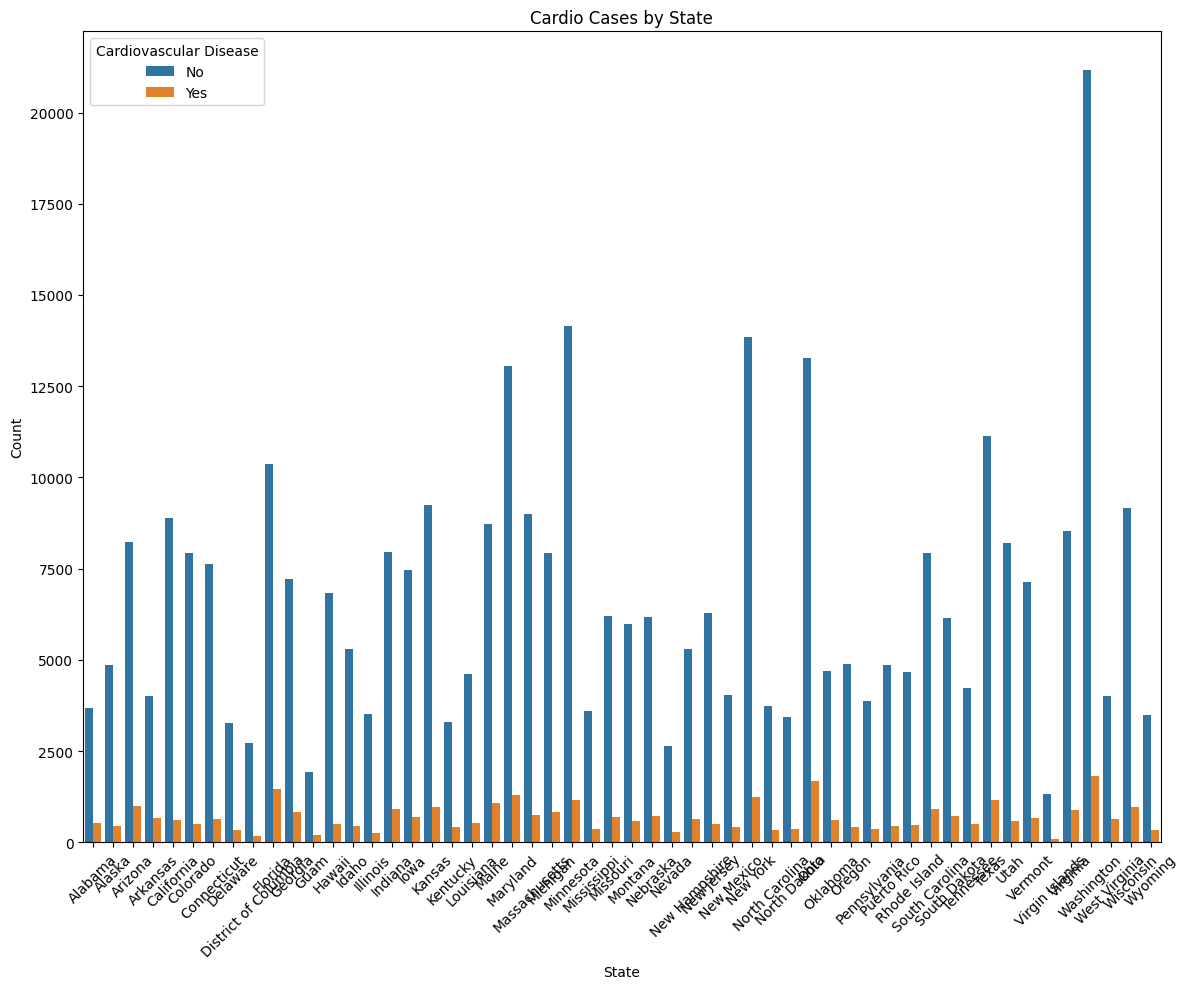

In [ ]:
plt.figure(figsize=(12, 10))
sb.countplot(x='State', hue='HaveCardiovascularDisease', data=categorical_data)
plt.title('Cardio Cases by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

In [ ]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each age group
total_counts = categorical_data.groupby('State')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('State')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by State:")
for state, p in percentage.items():
    print(f"{state}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by State:
Alabama: 12.57%
Alaska: 8.38%
Arizona: 10.80%
Arkansas: 14.16%
California: 6.53%
Colorado: 5.88%
Connecticut: 7.64%
Delaware: 9.02%
District of Columbia: 5.80%
Florida: 12.40%
Georgia: 10.23%
Guam: 8.92%
Hawaii: 6.85%
Idaho: 7.71%
Illinois: 6.76%
Indiana: 10.26%
Iowa: 8.36%
Kansas: 9.56%
Kentucky: 11.24%
Louisiana: 10.47%
Maine: 11.00%
Maryland: 8.96%
Massachusetts: 7.55%
Michigan: 9.57%
Minnesota: 7.54%
Mississippi: 9.32%
Missouri: 10.08%
Montana: 8.75%
Nebraska: 10.40%
Nevada: 9.69%
New Hampshire: 10.94%
New Jersey: 7.37%
New Mexico: 9.47%
New York: 8.26%
North Carolina: 8.10%
North Dakota: 9.49%
Ohio: 11.25%
Oklahoma: 11.63%
Oregon: 7.71%
Pennsylvania: 8.34%
Puerto Rico: 8.54%
Rhode Island: 9.14%
South Carolina: 10.21%
South Dakota: 10.50%
Tennessee: 10.80%
Texas: 9.35%
Utah: 6.55%
Vermont: 8.51%
Virgin Islands: 5.45%
Virginia: 9.33%
Washington: 7.88%
West Virginia: 13.60%
Wisconsin: 9.45%
Wyoming: 8.56%
/tmp/ipykernel_62/248

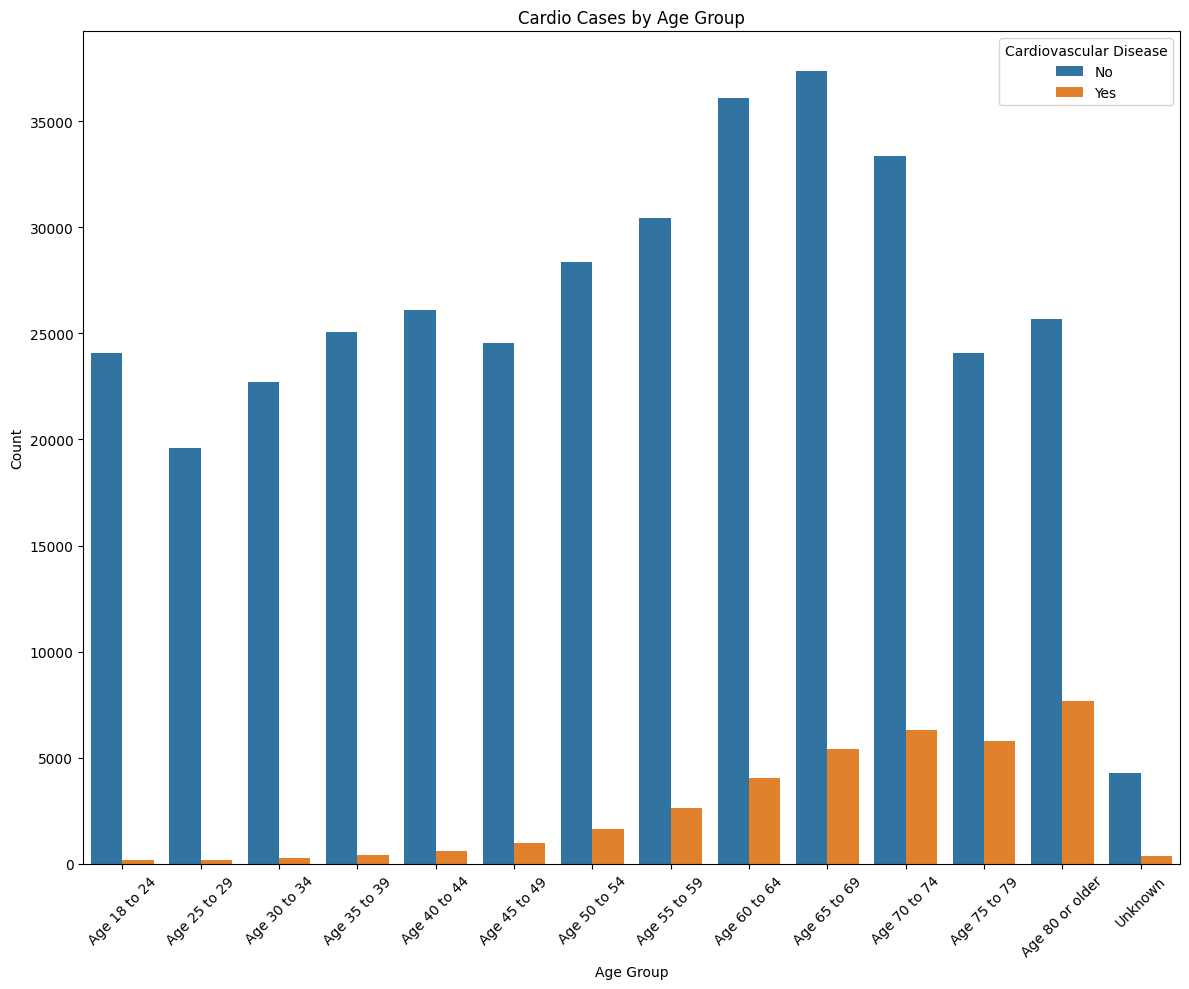

In [ ]:
plt.figure(figsize=(12, 10))
sb.countplot(x='AgeCategory', hue='HaveCardiovascularDisease', data=categorical_data)


plt.title('Cardio Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()

plt.show()

In [ ]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each age group
total_counts = categorical_data.groupby('AgeCategory')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('AgeCategory')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by Age Group:")
for age_group, p in percentage.items():
    print(f"{age_group}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by Age Group:
Age 18 to 24: 0.70%
Age 25 to 29: 0.92%
Age 30 to 34: 1.19%
Age 35 to 39: 1.65%
Age 40 to 44: 2.34%
Age 45 to 49: 3.81%
Age 50 to 54: 5.50%
Age 55 to 59: 7.91%
Age 60 to 64: 10.08%
Age 65 to 69: 12.65%
Age 70 to 74: 15.94%
Age 75 to 79: 19.38%
Age 80 or older: 23.00%
Unknown: 7.51%
/tmp/ipykernel_62/4253127977.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = categorical_data.groupby('AgeCategory')['HaveCardiovascularDisease'].count()
/tmp/ipykernel_62/4253127977.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_yes_counts 

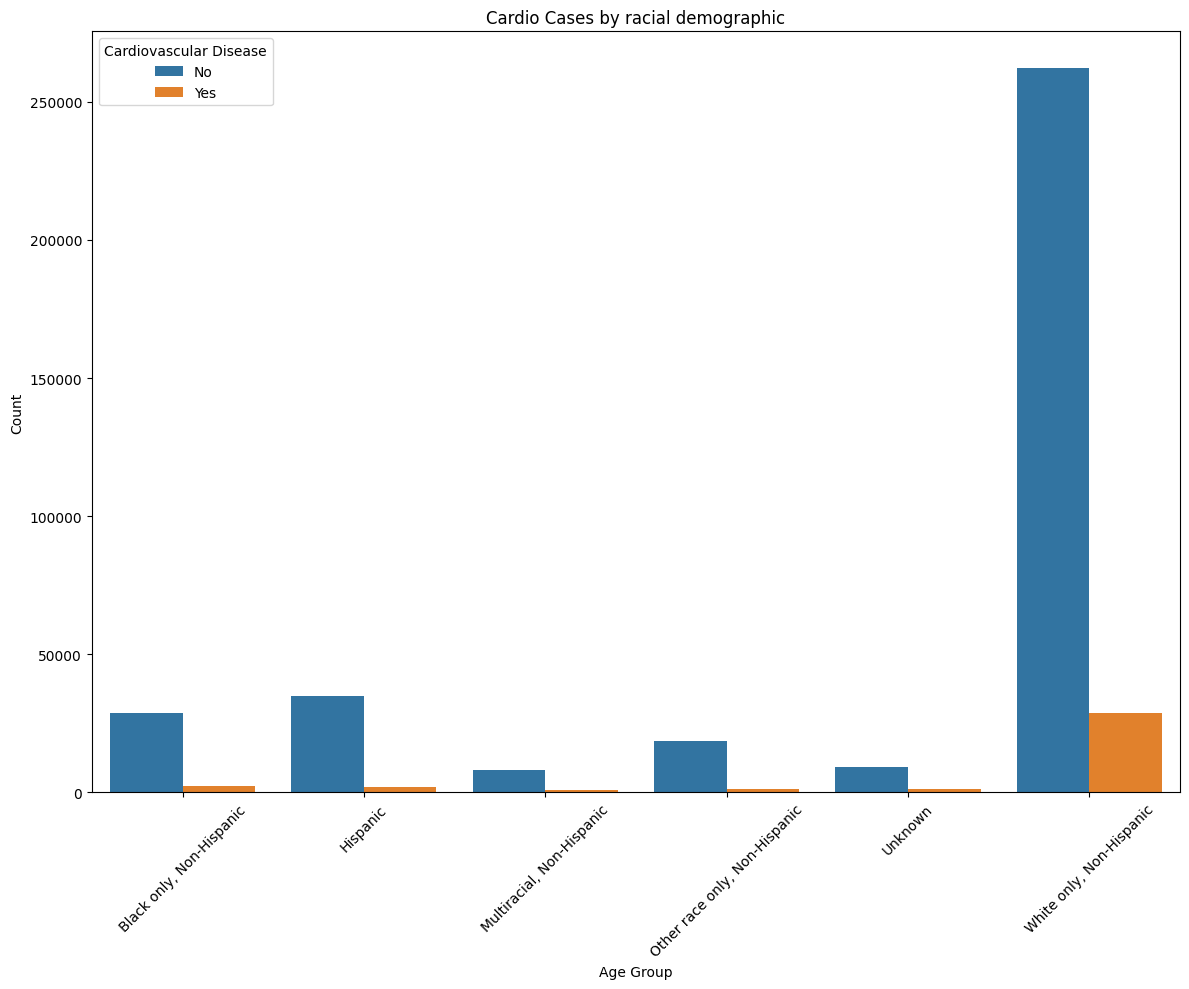

In [ ]:
plt.figure(figsize=(12, 10))
sb.countplot(x='RaceEthnicityCategory', hue='HaveCardiovascularDisease', data=categorical_data)
plt.title('Cardio Cases by racial demographic')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

In [ ]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each racial demo
total_counts = categorical_data.groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by RaceEthnicityCategory:")
for race_ethnicity, p in percentage.items():
    print(f"{race_ethnicity}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by RaceEthnicityCategory:
Black only, Non-Hispanic: 7.69%
Hispanic: 5.74%
Multiracial, Non-Hispanic: 9.07%
Other race only, Non-Hispanic: 6.69%
Unknown: 10.49%
White only, Non-Hispanic: 9.88%
/tmp/ipykernel_62/4226755961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = categorical_data.groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
/tmp/ipykernel_62/4226755961.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('RaceEthnici

## ML models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


# Replace infinite values and handle NaNs
heart.replace([np.inf, -np.inf], np.nan, inplace=True)
heart.fillna(heart.mean(numeric_only=True), inplace=True)  # Numeric columns
for column in heart.select_dtypes(include='object').columns:
    heart[column].fillna(heart[column].mode()[0], inplace=True)  # Categorical columns

# Split the features and target
X = heart.drop('HaveCardiovascularDisease', axis=1)
y = heart['HaveCardiovascularDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the 'preprocessor' and data splits (X_train, X_test, y_train, y_test) are already defined

# Create the Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Predict and evaluate
logistic_predictions = logistic_pipeline.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Dynamically extract labels from y_test to avoid confusion matrix errors
labels = np.unique(y_test)
cm = confusion_matrix(y_test, logistic_predictions, labels=labels)

# Print the confusion matrix and calculate detailed metrics
print("Confusion Matrix:", cm)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"False Negative Rate (FNR): {fn / (fn + tp):.2f}")
print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
print(f"True Negative Rate (TNR): {tn / (tn + fp):.2f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     72277
         Yes       0.54      0.11      0.18      7368

    accuracy                           0.91     79645
   macro avg       0.73      0.55      0.57     79645
weighted avg       0.88      0.91      0.88     79645

Confusion Matrix: [[71600   677]
 [ 6559   809]]
TN=71600, FP=677, FN=6559, TP=809
False Negative Rate (FNR): 0.89
False Positive Rate (FPR): 0.01
True Positive Rate (TPR): 0.11
True Negative Rate (TNR): 0.99


This code defines and uses a machine learning pipeline for logistic regression to classify data, evaluate its performance, and calculate specific performance metrics. Here's a breakdown of its functionality:

1. **Definition of a machine learning pipeline**: It creates a pipeline comprising a preprocessor and a logistic regression classifier. The preprocessor is assumed to be defined elsewhere and is responsible for data preparation (scaling numerical features and encoding categorical features). The classifier uses the 'saga' solver and is set to iterate up to 1000 times to converge to a solution.
   
2. **Model training**: The pipeline is then trained (`fit`) on a training dataset (`X_train` for features, `y_train` for the target variable).

3. **Prediction and evaluation**: The trained model is used to make predictions on a testing dataset (`X_test`). These predictions are then compared against the test's true values (`y_test`) to generate a classification report that includes precision, recall, f1-score, and accuracy.

4. **Confusion matrix and detailed metrics**: The confusion matrix is computed from the true values and predictions, allowing the calculation of True Negative (TN), False Positive (FP), False Negative (FN), and True Positive (TP) counts. From these, it calculates detailed performance metrics such as the False Negative Rate (FNR), False Positive Rate (FPR), True Positive Rate (TPR, also known as sensitivity or recall), and True Negative Rate (TNR, also known as specificity).

In summary, this code snippet is a comprehensive approach to applying logistic regression for binary classification, assessing its accuracy, and providing detailed insights into its performance in distinguishing between classes.

In [ ]:
## GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the 'preprocessor' and data splits (X_train, X_test, y_train, y_test) are already defined

# Create the Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate
gb_predictions = gb_pipeline.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

# Confusion Matrix handling
labels = np.unique(y_test)
cm = confusion_matrix(y_test, gb_predictions, labels=labels)
print("Confusion Matrix:", cm)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"False Negative Rate (FNR): {fn / (fn + tp):.2f}")
print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
print(f"True Negative Rate (TNR): {tn / (tn + fp):.2f}")


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     72277
         Yes       0.54      0.11      0.18      7368

    accuracy                           0.91     79645
   macro avg       0.73      0.55      0.57     79645
weighted avg       0.88      0.91      0.88     79645

Confusion Matrix: [[71594   683]
 [ 6554   814]]
TN=71594, FP=683, FN=6554, TP=814
False Negative Rate (FNR): 0.89
False Positive Rate (FPR): 0.01
True Positive Rate (TPR): 0.11
True Negative Rate (TNR): 0.99


This code creates and evaluates a Gradient Boosting Classifier model for classification tasks using a predefined data preprocessing pipeline and data that has been split into training and testing sets. The steps are as follows:

1. **Import necessary libraries** - It imports the GradientBoostingClassifier for creating the model, Pipeline for combining preprocessing and model training steps into a single process, and other necessary utilities for evaluation.

2. **Setup a Gradient Boosting pipeline** - A pipeline named `gb_pipeline` is established, incorporating both a preprocessing step (assumed pre-defined as `preprocessor`) and the classifier definition itself. The classifier is set up with a specific number of estimators (`n_estimators=100`), learning rate (`learning_rate=1.0`), maximum depth of the individual regression estimators (`max_depth=1`), and a random state for reproducibility.

3. **Train the Model** - The pipeline, encompassing preprocessing and the Gradient Boosting Classifier, is then trained using the training set (`X_train` and `y_train`).

4. **Make Predictions and Evaluate** - After training, predictions are made on the test set (`X_test`). A classification report is generated providing precision, recall, and f1-score for each class (presumably 'Yes' and 'No' or similar binary outcomes), as well as overall accuracy. The class labels used in `y_test` are dynamically identified and utilized in the confusion matrix calculation, which breaks down true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP). From the confusion matrix, detailed metrics such as False Negative Rate (FNR), False Positive Rate (FPR), True Positive Rate (TPR), and True Negative Rate (TNR) are calculated and printed to provide deeper insights into the model performance.

The code demonstrates a thorough approach to applying a machine learning model using sklearn's pipeline feature, enabling streamlined preprocessing and model evaluation, particularly useful in classification tasks where understanding different aspects of model performance (beyond just accuracy) is critical.

Random Forest Classification Report:

              precision    recall  f1-score   support

          No       0.91      0.99      0.95     72277
         Yes       0.52      0.07      0.12      7368

    accuracy                           0.91     79645
   macro avg       0.71      0.53      0.53     79645
weighted avg       0.88      0.91      0.87     79645



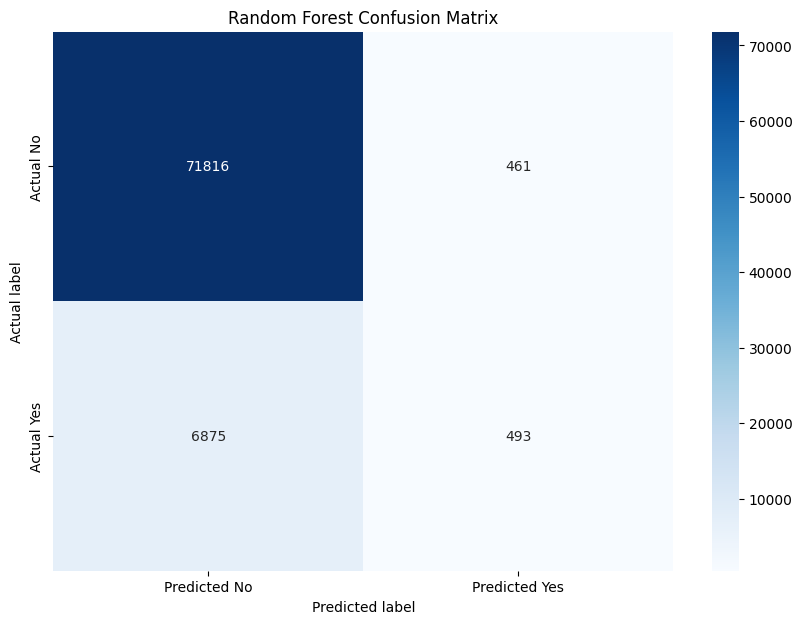

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Reduce the number of estimators to speed up training
# Use n_jobs=-1 to use all available CPU cores
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_pipeline.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_predictions))

rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

This code creates and trains a Random Forest classifier to predict outcomes based on a set of features and evaluates the model's performance on a test dataset. It performs the following steps:

1. **Import Libraries**: Includes necessary tools from sklearn for building a Random Forest model and Pipelines, as well as seaborn and matplotlib for visualization.

2. **Create a Pipeline**: It constructs a machine learning pipeline that applies preprocessing (contained in the variable `preprocessor`, not shown in the snippet) and then fits a Random Forest classifier. The classifier is configured with 50 trees (`n_estimators=50`) to balance between performance and computational efficiency, a fixed `random_state` for reproducibility of results, and `n_jobs=-1` to utilize all available CPU cores for faster training.

3. **Train the Model**: Uses the pipeline to fit the model on a training dataset (`X_train`, `y_train`).

4. **Model Prediction and Evaluation**: 
   - It makes predictions on the test dataset (`X_test`) and prints a classification report that includes metrics such as precision, recall, and F1-score, providing insights into the model's performance across different classes (e.g., 'Yes', 'No').
   - Uses the `confusion_matrix` function to compute the confusion matrix between the true labels (`y_test`) and predictions (`rf_predictions`), facilitating the evaluation of how well the model predicts each class.

5. **Visualize Confusion Matrix**: Generates a heatmap visualization of the confusion matrix using seaborn (with `sns.heatmap`) to visually represent the model's performance. The heatmap shows the number of true positives, true negatives, false positives, and false negatives, with labels for actual and predicted classes. The visualization is enhanced with a specific figure size, color map ('Blues'), and custom axis labels to improve readability.

Overall, the purpose of this code is to leverage a Random Forest Classifier for predictive analysis, assess the model's accuracy and error types through various performance metrics, and visually represent the results to offer clear insights into the model's behavior.

In [ ]:
# Assuming model predictions and true labels are stored in variables 'rf_predictions' and 'y_test' respectively
from sklearn.metrics import accuracy_score, confusion_matrix

# Substitute 'y_true' with 'y_test' to match common variable names for true labels
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Classification Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, rf_predictions)
TP = cm[1, 1]  # True Positives: Y predicted as Y
TN = cm[0, 0]  # True Negatives: N predicted as N
FP = cm[0, 1]  # False Positives: N predicted as Y
FN = cm[1, 0]  # False Negatives: Y predicted as N

TPR = TP / (TP + FN)  # True Positive Rate = TP / (TP + FN)
TNR = TN / (TN + FP)  # True Negative Rate = TN / (TN + FP)
FNR = FN / (FN + TP)  # False Negative Rate = FN / (TP + FN)
FPR = FP / (FP + TN)  # False Positive Rate = FP / (TN + FP)

print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")

Classification Accuracy: 0.91
True Positive Rate (TPR): 0.07
True Negative Rate (TNR): 0.99
False Negative Rate (FNR): 0.93
False Positive Rate (FPR): 0.01


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision tree classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TP = cm[1, 1]  # True Positives: Y predicted as Y
TN = cm[0, 0]  # True Negatives: N predicted as N
FP = cm[0, 1]  # False Positives: N predicted as Y
FN = cm[1, 0]  # False Negatives: Y predicted as N

TPR = TP / (TP + FN)  # True Positive Rate = TP / (TP + FN)
TNR = TN / (TN + FP)  # True Negative Rate = TN / (TN + FP)
FNR = FN / (FN + TP)  # False Negative Rate = FN / (TP + FN)
FPR = FP / (FP + TN)  # False Positive Rate = FP / (TN + FP)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"True Positive Rate (Sensitivity): {TPR:.2f}")
print(f"True Negative Rate (Specificity): {TNR:.2f}")
print(f"False Positive Rate: {FPR:.2f}")
print(f"False Negative Rate: {FNR:.2f}")

Confusion Matrix:
[[66504  5773]
 [ 5544  1824]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92     72277
         Yes       0.24      0.25      0.24      7368

    accuracy                           0.86     79645
   macro avg       0.58      0.58      0.58     79645
weighted avg       0.86      0.86      0.86     79645


Accuracy: 0.86
True Positive Rate (Sensitivity): 0.25
True Negative Rate (Specificity): 0.92
False Positive Rate: 0.08
False Negative Rate: 0.75


This code defines, trains, and evaluates a Decision Tree Classifier using a scikit-learn pipeline. The steps involved are as follows:

1. **Initialization of the Pipeline**: It sets up a pipeline with two stages: preprocessing (with an object named `preprocessor`), and a decision tree classifier with a specified `random_state` for reproducibility.

2. **Model Training**: The pipeline, including both the preprocessing and the decision tree classifier, is trained on the training dataset `X_train` with the corresponding labels `y_train`.

3. **Making Predictions**: Once trained, the model is used to predict outcomes on the test dataset `X_test`.

4. **Model Evaluation**: 
   - A confusion matrix (`cm`) is computed for the predictions against the true labels `y_test`, from which True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) are extracted.
   - Several performance metrics are calculated including:
     - **True Positive Rate (Sensitivity)**: The proportion of positive cases correctly identified.
     - **True Negative Rate (Specificity)**: The proportion of negative cases accurately identified.
     - **False Positive Rate**: The proportion of negative cases incorrectly classified as positive.
     - **False Negative Rate**: The proportion of positive cases incorrectly classified as negative.
   - The accuracy of the model is calculated and printed alongside the confusion matrix and a classification report that includes precision, recall, and F1-scores for each class together with overall accuracy and weighted averages of these metrics.

Overall, the code demonstrates the steps to prepare, apply, and assess the performance of a decision tree model for classification tasks using a dataset split into training and testing sets.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Test Set (Max Depth 3)')

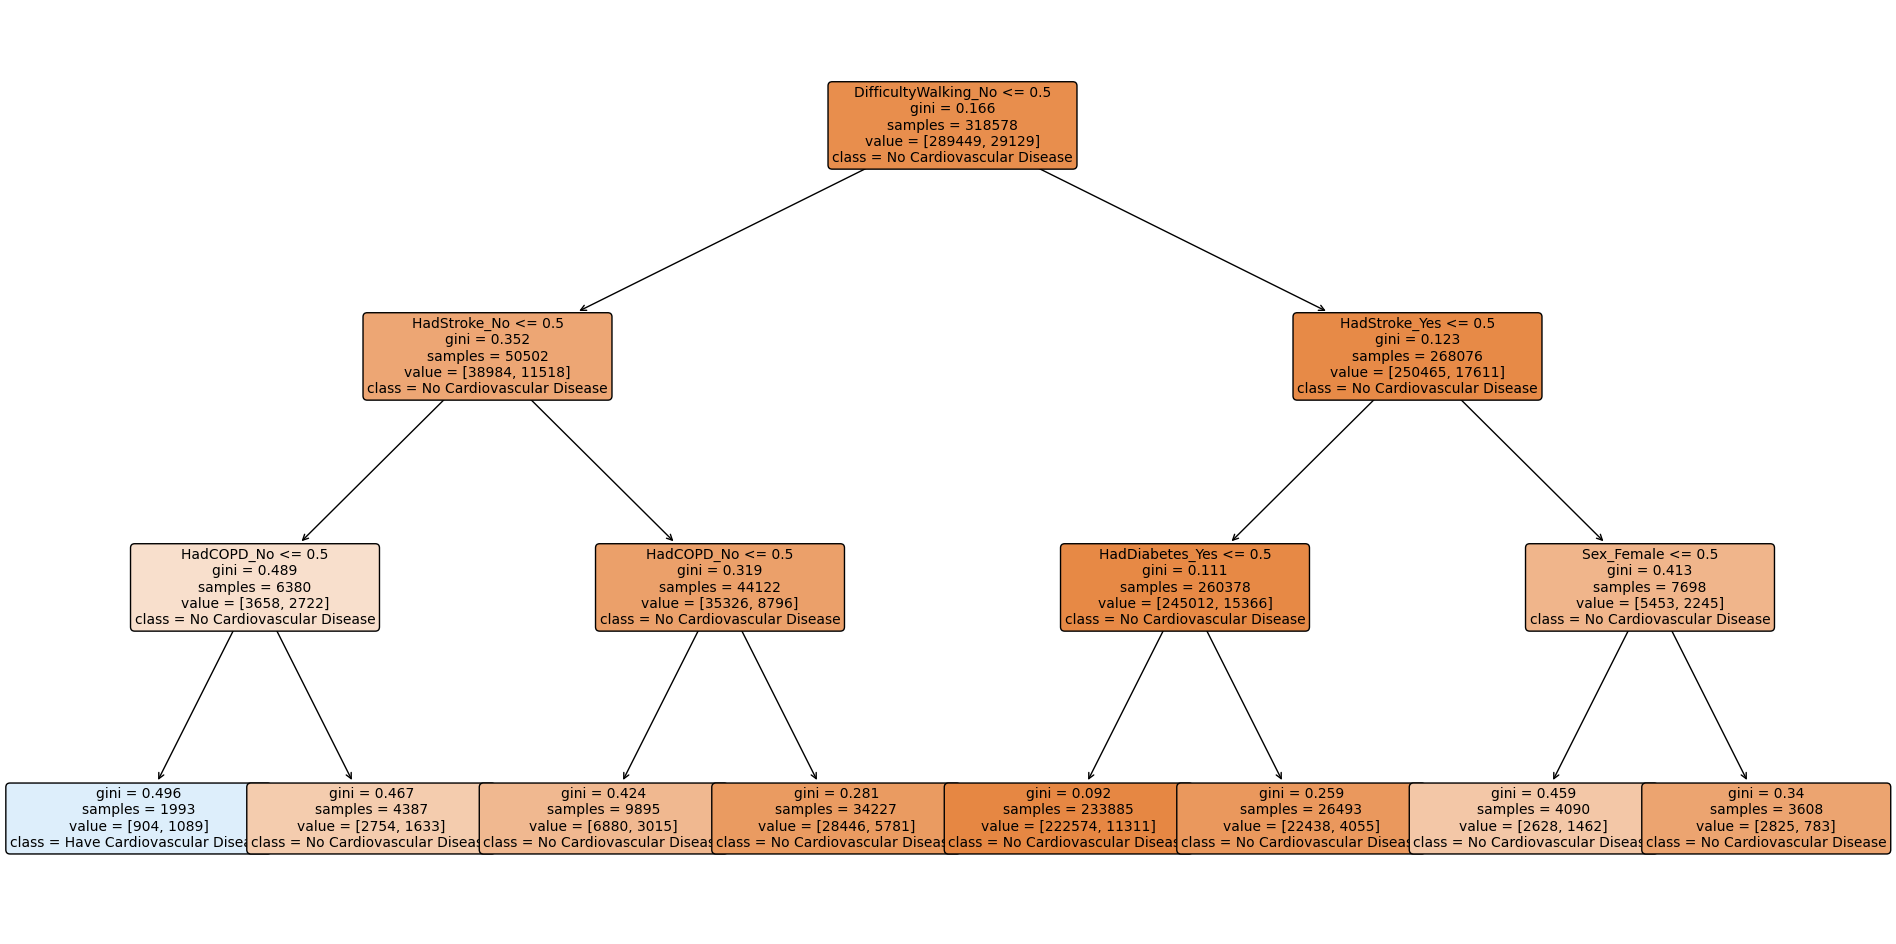

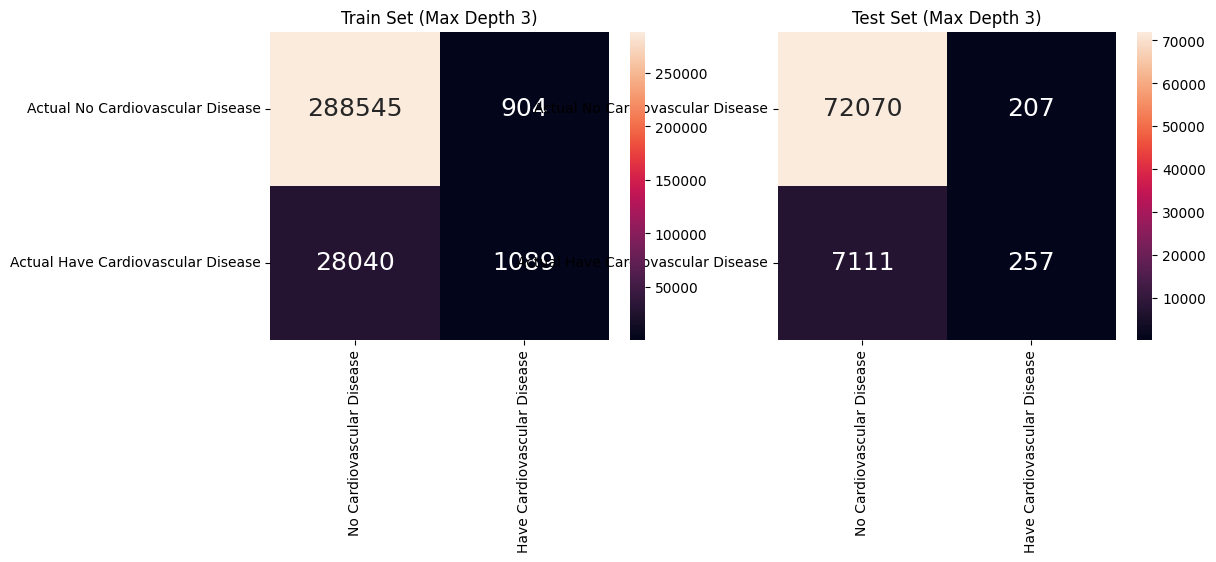

In [ ]:
# Considering the primary issue is related to fitting the model with categorical string data,
# the provided code lacks the preprocessing step to encode or handle categorical features before fitting the model.
# An appropriate fix would incorporate preprocessing to convert categorical data to numerical format.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming X_train, y_train, X_test, y_test are defined and ready to use
# and assuming the 'State' column or similar categorical columns are causing the issue

# Example of preprocessing to encode categorical variables first
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

pipeline.fit(X_train, y_train)

# Preparing feature names correctly for visualization
active_features = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names(categorical_features)
all_features = list(active_features) + list(X_train.select_dtypes(exclude=['object', 'category']).columns)

f = plt.figure(figsize=(24,12))
plot_tree(pipeline.named_steps['classifier'], filled=True, rounded=True, feature_names=all_features, class_names=["No Cardiovascular Disease","Have Cardiovascular Disease"], fontsize=10)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0], xticklabels=["No Cardiovascular Disease", "Have Cardiovascular Disease"], yticklabels=["Actual No Cardiovascular Disease", "Actual Have Cardiovascular Disease"])
axes[0].set_title('Train Set (Max Depth 3)')
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1], xticklabels=["No Cardiovascular Disease", "Have Cardiovascular Disease"], yticklabels=["Actual No Cardiovascular Disease", "Actual Have Cardiovascular Disease"])
axes[1].set_title('Test Set (Max Depth 3)')



**Pipeline Creation**: The code creates a pipeline combining the preprocessing step (categorical data encoding) with a Decision Tree Classifier. The classifier is configured with a maximum depth of 3 to prevent overfitting, and a `random_state` for reproducible results.


**Visualization and Evaluation**:
   - A decision tree visualization displays how the model makes decisions based on the processed features, including both the originally numeric and newly encoded categorical features.
   - The confusion matrix for both the training and test sets is visualized using heatmaps to show the distribution of true and predicted labels, offering insight into the model's performance, including its accuracy and possible biases towards certain classes.

